In [5]:
from adaptivetesting.math import generate_response_pattern
from adaptivetesting.models import ItemPool
import jax.numpy as np
import jax.numpy as np
from jax import grad
from adaptivetesting.math.estimators.__functions.__estimators import log_posterior as log_p

In [6]:
difficulties = np.array([-0.6265,0.1836,-0.8356])
ability = np.array([0], dtype="float32")
# convert difficulties into items
item_pool = ItemPool.load_from_list(b=difficulties)
# generate response pattern
response_pattern = np.array(generate_response_pattern(
ability,
item_pool.test_items,
1234))

a = np.array([item.a for item in item_pool.test_items])
b = np.array([item.b for item in item_pool.test_items])
c = np.array([item.c for item in item_pool.test_items])
d = np.array([item.d for item in item_pool.test_items])

In [ ]:
optimization_interval = (-10, 10)

log_posterior = lambda mu: log_p(mu, a, b, c, d, response_pattern)
# calcualte first derivative of the log-likelihood function
score_function = grad(log_posterior)

In [32]:
# discretize domain of score function
x = np.linspace(optimization_interval[0], optimization_interval[1], 50000)
x = np.expand_dims(x, axis=1)

In [33]:
# small step 
dx = x[1] - x[0]

dx

Array([0.00040054], dtype=float32)

In [34]:
# evaluate function for each point
score_function_values_x = np.vectorize(score_function)(x)

In [14]:
import matplotlib.pyplot as plt

In [35]:
# calculate the weighted mean
weighted_mean = np.sum(x * score_function_values_x * dx)

# variance
variance = np.sum(((x - weighted_mean)**2) * score_function_values_x * dx)

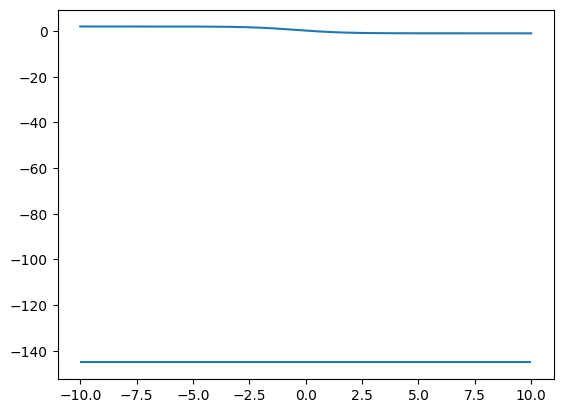

In [17]:
plt.plot(x, score_function_values_x)
plt.hlines(weighted_mean, -10, 10)

In [36]:
np.cov(score_function_values_x.T)

Array(1.7818465, dtype=float32)

In [37]:
np.sqrt(np.cov(score_function_values_x.T))

Array(1.3348583, dtype=float32)

In [42]:
mean = np.mean(score_function_values_x * dx )
variance = np.mean(((score_function_values_x - mean) ** 2) * dx)

mean**2,  1 / np.sqrt(variance)

(Array(3.051012e-08, dtype=float32), Array(35.584038, dtype=float32))

In [41]:
np.var(score_function_values_x.T)

Array(1.7816778, dtype=float32)